In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [39]:
#load dataset
df=pd.read_csv('Dataset.csv')

In [40]:
df1=df.copy()
df1

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no


In [41]:
#LEVEL_1

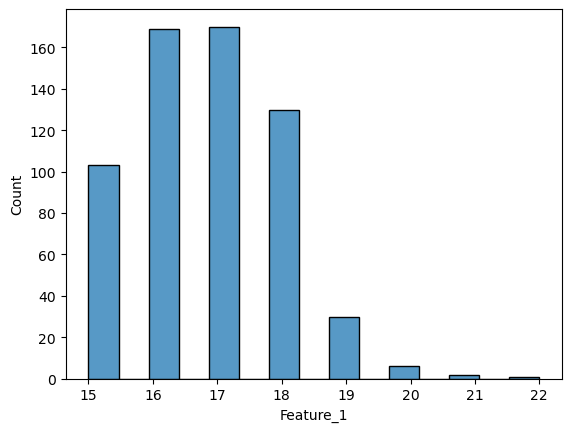

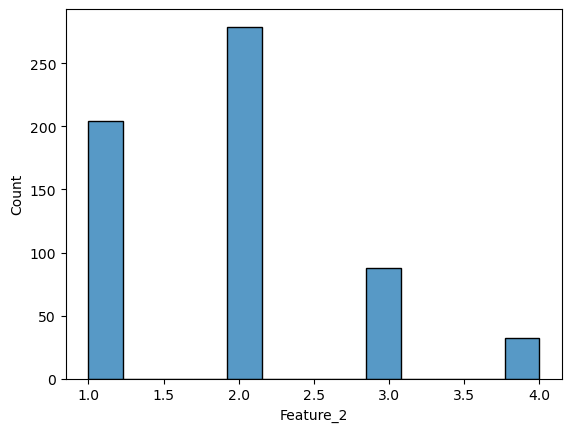

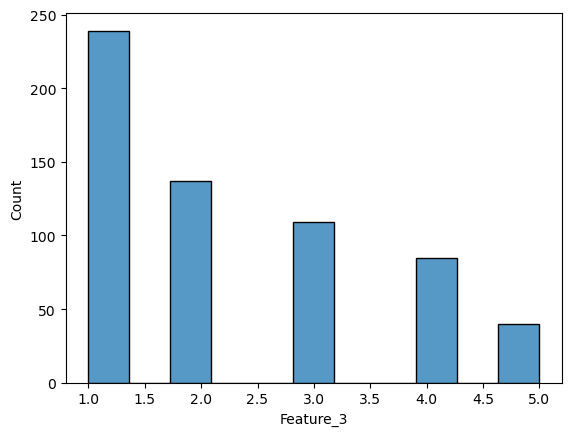

In [42]:
for features in ['Feature_1','Feature_2','Feature_3']:
    plt.figure()
    sns.histplot(df1[features].dropna())
    plt.show()

In [43]:
# Filter the dataframe to keep only numerical columns (excluding object/string columns)
numerical_df=df1.loc[:,df1.dtypes != 'object']
numerical_df

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
0,4,4.0,2.0,0,4,3.0,4,1,3,4.0,0,11.0,11,18.0,2.0,1.0
1,1,1.0,NaN,0,5,3.0,3,1,3,2.0,9,11.0,11,17.0,2.0,1.0
2,1,1.0,1.0,0,4,3.0,2,2,3,6.0,12,13.0,12,15.0,NaN,3.0
3,4,2.0,1.0,0,3,2.0,2,1,5,0.0,14,14.0,14,15.0,3.0,1.0
4,3,3.0,1.0,0,4,3.0,2,1,5,0.0,11,13.0,13,16.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3.0,1.0,1,5,4.0,2,1,5,4.0,10,11.0,10,19.0,3.0,2.0
645,3,1.0,1.0,0,4,NaN,4,1,1,NaN,15,15.0,16,18.0,2.0,1.0
646,1,1.0,2.0,0,1,1.0,1,1,5,6.0,11,12.0,9,18.0,NaN,1.0
647,3,1.0,2.0,0,2,4.0,5,3,2,6.0,10,10.0,10,NaN,1.0,4.0


<Axes: >

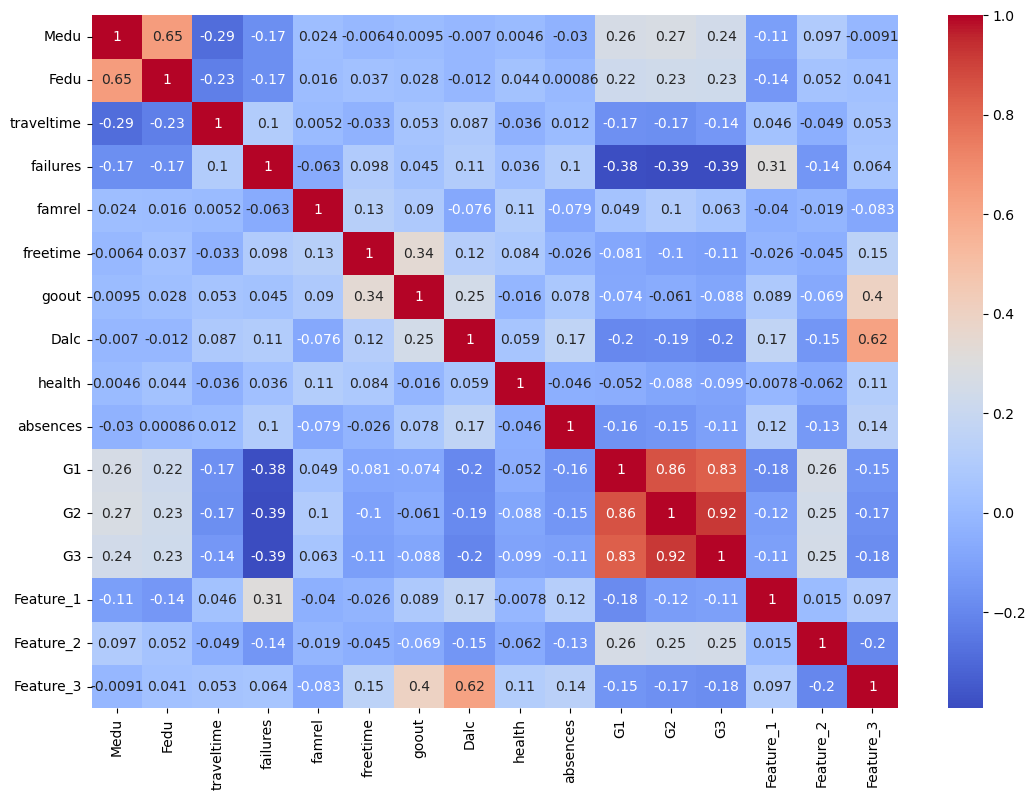

In [44]:
#correlation heatmap
plt.figure(figsize=(13,9))
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm')

In [45]:
'''
feature_1 is highly correlated with the failures,Dalc,absences.So,it could be about STUDENT DISCIPLINE
feature_2 is highly correlated with the G1,G2,G3.So,it could be about ACADEMIC PERFORMANCE
feature_3 is highly correlated with the goout,Dalc.So it could be about LIFESTYLE & BEHAVIOUR
'''

'\nfeature_1 is highly correlated with the failures,Dalc,absences.So,it could be about STUDENT DISCIPLINE\nfeature_2 is highly correlated with the G1,G2,G3.So,it could be about ACADEMIC PERFORMANCE\nfeature_3 is highly correlated with the goout,Dalc.So it could be about LIFESTYLE & BEHAVIOUR\n'

In [46]:
#LEVEL_2

In [47]:
# Check for missing values in the dataframe df1
df1.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [48]:
for col in df.columns:
   if df1[col].dtype != 'object':
# For numeric columns, fill missing values with the mean of that column
         df1.fillna({col: df1[col].mean()},inplace=True)
   else:
 # For object/categorical columns, fill missing values with the most frequent value (mode)
        df1.fillna({col: df1[col].mode()[0]},inplace=True)

In [49]:
#check
df1.higher.unique()

array(['yes', 'no'], dtype=object)

In [50]:
#LEVEL_3

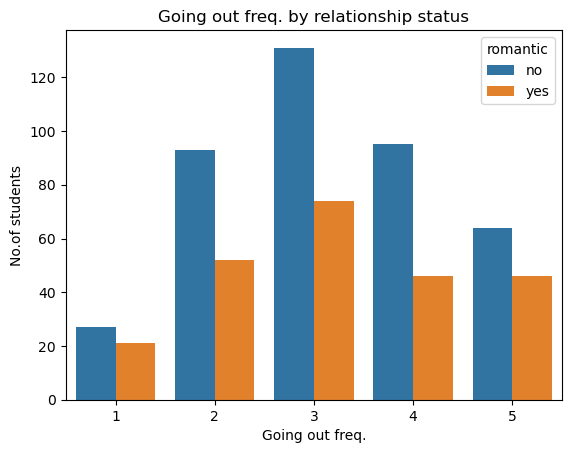

In [51]:
#q1
#Do the students in relationship go out often compared with singles?
sns.countplot(data=df1,x='goout',hue='romantic')
plt.title('Going out freq. by relationship status')
plt.xlabel('Going out freq.')
plt.ylabel('No.of students')
plt.show()

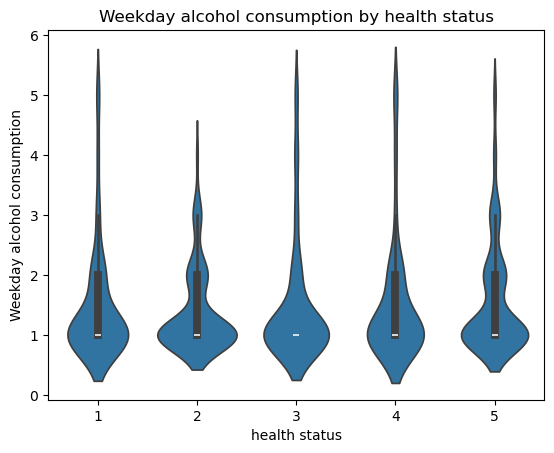

In [52]:
#q2
#How does Weekday alcohol consumption effect health status?
sns.violinplot(x='health',y='Dalc',data=df1)
plt.title('Weekday alcohol consumption by health status')
plt.xlabel('health status')
plt.ylabel('Weekday alcohol consumption')
plt.show()

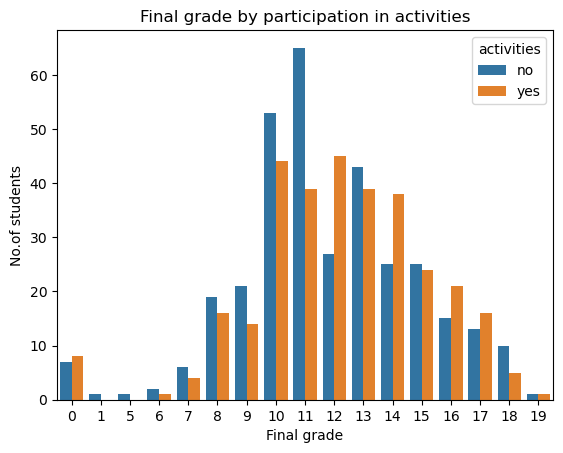

In [53]:
#q3
#How does participation in extracurricular activities effect Final grades
sns.countplot(data=df1,x='G3',hue='activities')
plt.title('Final grade by participation in activities')
plt.xlabel('Final grade')
plt.ylabel('No.of students')
plt.show()

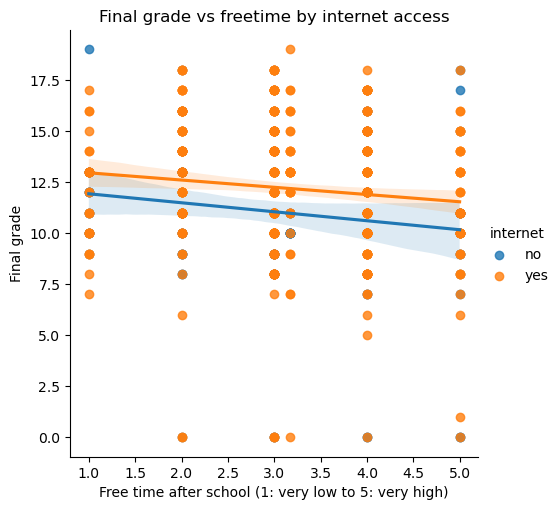

In [54]:
#q4
#Does having internet access change how freetime affects final grade of students?
sns.lmplot(x='freetime',y='G3',hue='internet',data=df1)
plt.title('Final grade vs freetime by internet access')
plt.xlabel('Free time after school (1: very low to 5: very high)')
plt.ylabel('Final grade')
plt.show()

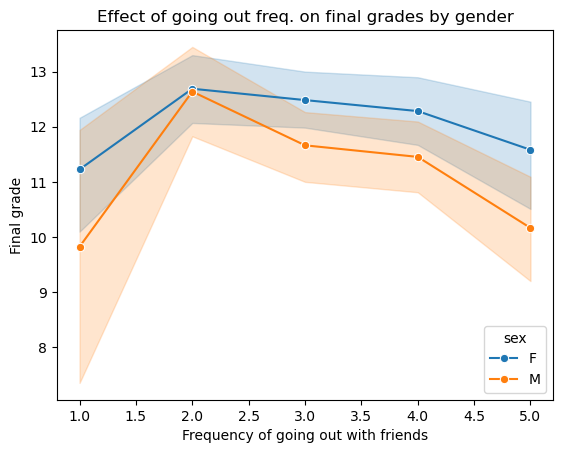

In [55]:
#q5
#Is there any effect on final grades by goin out freq. and how it varies with gender?
sns.lineplot(x='goout',y='G3',hue='sex',data=df1,marker='o')
plt.title('Effect of going out freq. on final grades by gender')
plt.xlabel('Frequency of going out with friends')
plt.ylabel('Final grade')
plt.show()


In [56]:
#LEVEL_4

In [57]:
# Convert all categorical (object) columns in the dataframe to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col]=le.fit_transform(df1[col])
        

In [58]:
df['romantic'].value_counts()

romantic
no     410
yes    239
Name: count, dtype: int64

In [59]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [60]:
x

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
0,0,0,1,0,0,4,4.0,0,4,0,...,4,1,3,4.000000,0,11.0,11,18.000000,2.000000,1.0
1,0,0,1,0,1,1,1.0,0,2,0,...,3,1,3,2.000000,9,11.0,11,17.000000,2.000000,1.0
2,0,0,1,1,1,1,1.0,0,2,2,...,2,2,3,6.000000,12,13.0,12,15.000000,1.913765,3.0
3,0,0,1,0,1,4,2.0,1,3,1,...,2,1,5,0.000000,14,14.0,14,15.000000,3.000000,1.0
4,0,0,1,0,1,3,3.0,2,2,1,...,2,1,5,0.000000,11,13.0,13,16.000000,1.913765,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,0,1,2,3.0,3,2,0,...,2,1,5,4.000000,10,11.0,10,19.000000,3.000000,2.0
645,1,0,1,1,1,3,1.0,4,3,0,...,4,1,1,3.746552,15,15.0,16,18.000000,2.000000,1.0
646,1,0,1,0,1,1,1.0,2,2,0,...,1,1,5,6.000000,11,12.0,9,18.000000,1.913765,1.0
647,1,1,1,1,1,3,1.0,3,3,0,...,5,3,2,6.000000,10,10.0,10,16.747954,1.000000,4.0


In [61]:
# Split dataset into 80% training and 20% testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [62]:
x_train

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3
111,0,0,0,0,1,3,3.000000,3,2,3,...,2,1,2,4.0,11,11.000000,11,16.000000,3.000000,1.000000
517,1,0,0,1,1,1,2.000000,2,2,3,...,5,1,2,0.0,14,14.000000,15,16.000000,1.000000,4.000000
454,1,0,1,0,1,1,2.000000,2,3,0,...,2,1,4,3.0,9,8.000000,8,16.000000,3.000000,2.000000
153,0,0,1,0,1,4,4.000000,4,3,0,...,2,1,5,2.0,13,13.000000,13,15.000000,3.000000,1.000000
441,1,1,1,0,1,1,1.000000,2,2,1,...,3,2,5,4.0,8,9.000000,9,17.000000,2.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,1,0,1,3,2.303819,1,2,0,...,4,2,3,4.0,8,9.000000,10,17.000000,2.000000,3.000000
53,0,0,1,0,1,4,4.000000,3,3,0,...,4,2,5,0.0,13,12.000000,12,15.000000,1.000000,3.000000
350,0,1,0,1,1,2,1.000000,0,3,0,...,1,1,5,0.0,9,11.586319,11,19.000000,3.000000,1.000000
79,0,0,1,0,1,3,4.000000,0,2,0,...,3,1,3,14.0,12,11.000000,11,16.747954,1.913765,2.000000


In [63]:
# Create and train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=8,random_state=100)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=8, random_state=100)

In [64]:
#predicting the outcome
y_pred=model.predict(x_test)

In [65]:
#calculating accuracy
accuracy_score(y_test,y_pred)

0.676923076923077

In [66]:
#LEVEL_5

In [67]:
# Extract only 'freetime' and 'G3' columns from training and test data for 2D visualization
x_train_2d=x_train.loc[:,['freetime','G3']]
x_test_2d=x_test.loc[:,['freetime','G3']]

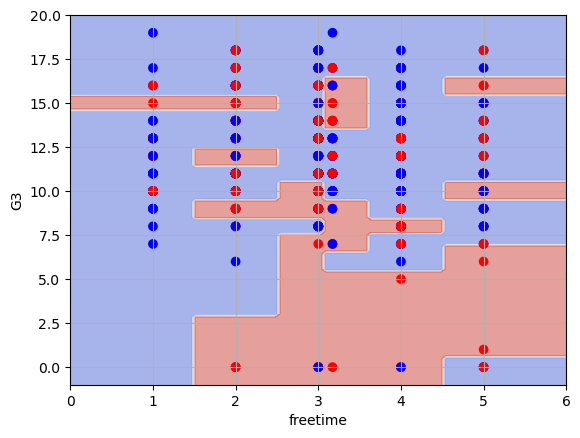

In [97]:
# Creating a 2D visualization of the Random Forest model's decision boundary using 2 features
from sklearn.inspection import DecisionBoundaryDisplay
x_2d=x.loc[:,['freetime','G3']]
model_2d=RandomForestClassifier(n_estimators=100,random_state=100)
model_2d.fit(x_2d,y)
y_pred_2d=model_2d.predict(x_test_2d)
disp=DecisionBoundaryDisplay.from_estimator(model_2d,x_2d,response_method="predict",cmap='coolwarm',alpha=0.5)
#disp.plot()
plt.scatter(x_2d.iloc[:,0],x_2d.iloc[:,1],c=y,cmap='bwr')
plt.grid(True)
plt.show()

In [82]:
!pip install shap

In [83]:
import shap

In [84]:
#shap explanation
explainer=shap.Explainer(model_2d,x_train_2d)
shap_values = explainer(x_test_2d)

<Figure size 640x480 with 0 Axes>

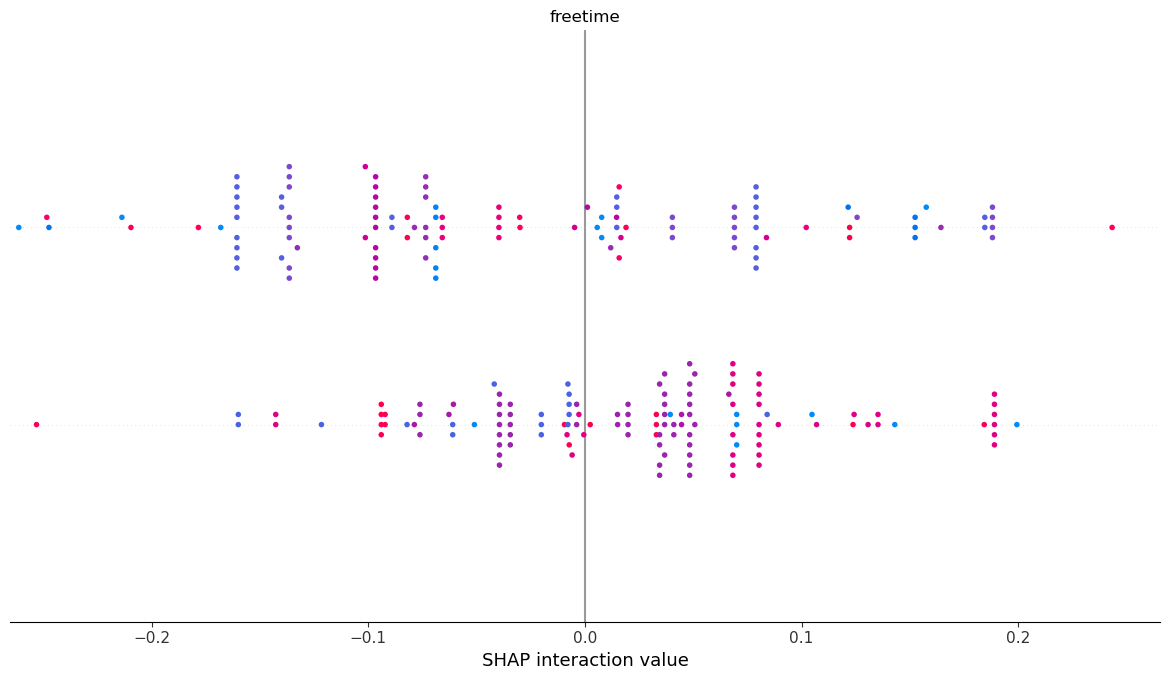

In [85]:
# Global feature importance
shap.summary_plot(shap_values,x_test_2d)

Explaining a 'Yes' prediction:


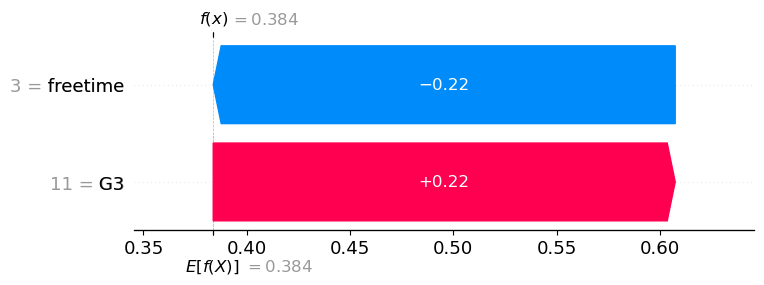

Explaining a 'No' prediction:


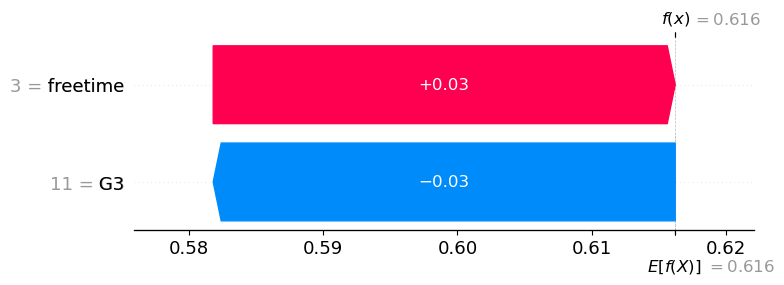

In [86]:
# Local explanations for two students
idx_yes = np.where(y_pred_2d == 1)[0][0]
idx_no = np.where(y_pred_2d == 0)[0][0]

print("Explaining a 'Yes' prediction:")
shap.initjs()
expl_1=shap.Explanation(values=shap_values[1].values[idx_yes],base_values=shap_values[1].base_values[idx_yes],data=x_2d.iloc[idx_yes].values,feature_names=x_2d.columns.tolist())
shap.plots.waterfall(expl_1)

print("Explaining a 'No' prediction:")
expl_2=shap.Explanation(values=shap_values[0].values[idx_no],base_values=shap_values[0].base_values[idx_no],data=x_2d.iloc[idx_no].values,feature_names=x_2d.columns.tolist())
shap.plots.waterfall(expl_2)

In [94]:
#just checking some values

In [87]:
idx_yes.dtype

dtype('int64')

In [88]:
idx_no

0

In [89]:
print(type(shap_values))
print(type(shap_values[1]))
print(shap_values[1].shape)
print(shap_values[1][idx_yes].shape)

<class 'shap._explanation.Explanation'>
<class 'shap._explanation.Explanation'>
(2, 2)
(2,)


In [90]:
shap_values[1].values[idx_no]

array([-0.14279115,  0.14279115])

In [91]:
print(type(shap_values[1][idx_yes]))
print(shap_values[1][idx_yes].shape)

<class 'shap._explanation.Explanation'>
(2,)


In [92]:
 expl_1

.values =
array([-0.22363845,  0.22363844])

.base_values =
0.3837656077438714

.data =
array([ 3., 11.])

In [93]:
x_2d.iloc[idx_no]

freetime     3.0
G3          11.0
Name: 0, dtype: float64

In [95]:
#BONUS_LEVEL

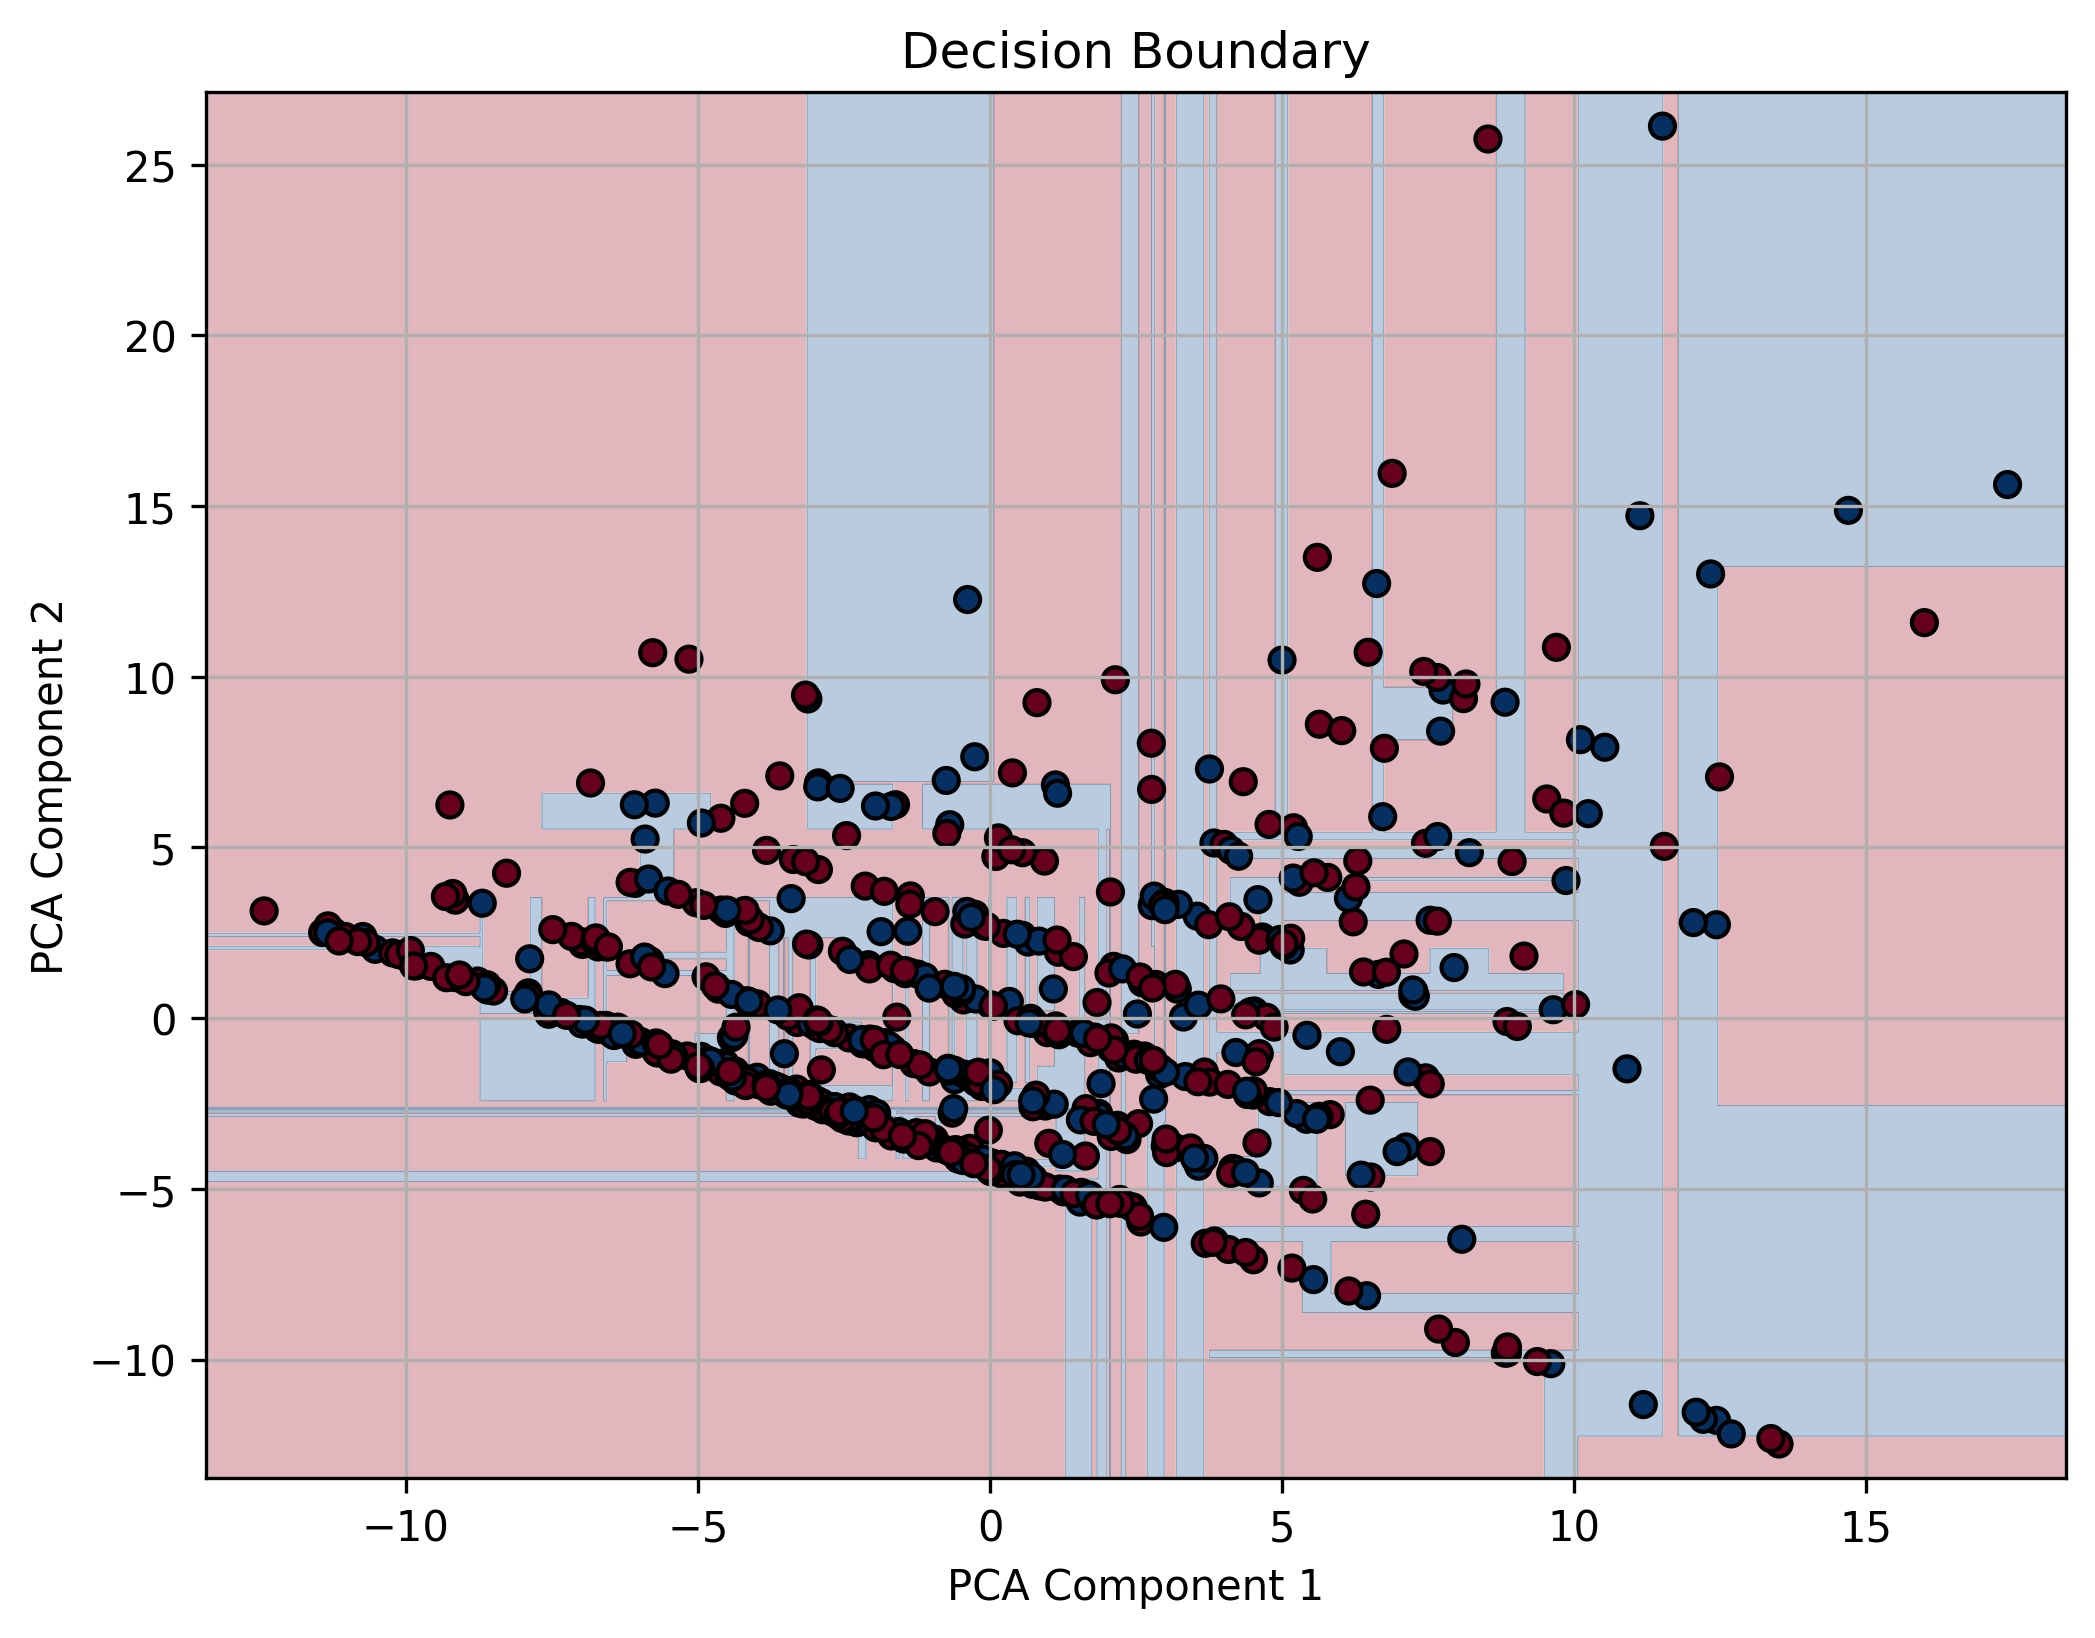

In [109]:
#PLOT_1
from IPython.display import Image
Image("plot1.png")

In [98]:
#PLOT_1
'''
Since the plot is non-linear and it appears to have rectangular,very sharp and axis aligned boundaries.So,
the model related to this decision boundary would be 'DECISION TREE'
'''

"\nSince the plot is non-linear and it appears to have rectangular,very sharp and axis aligned boundaries.So,\nthe model related to this decision boundary would be 'DECISION TREE'\n"

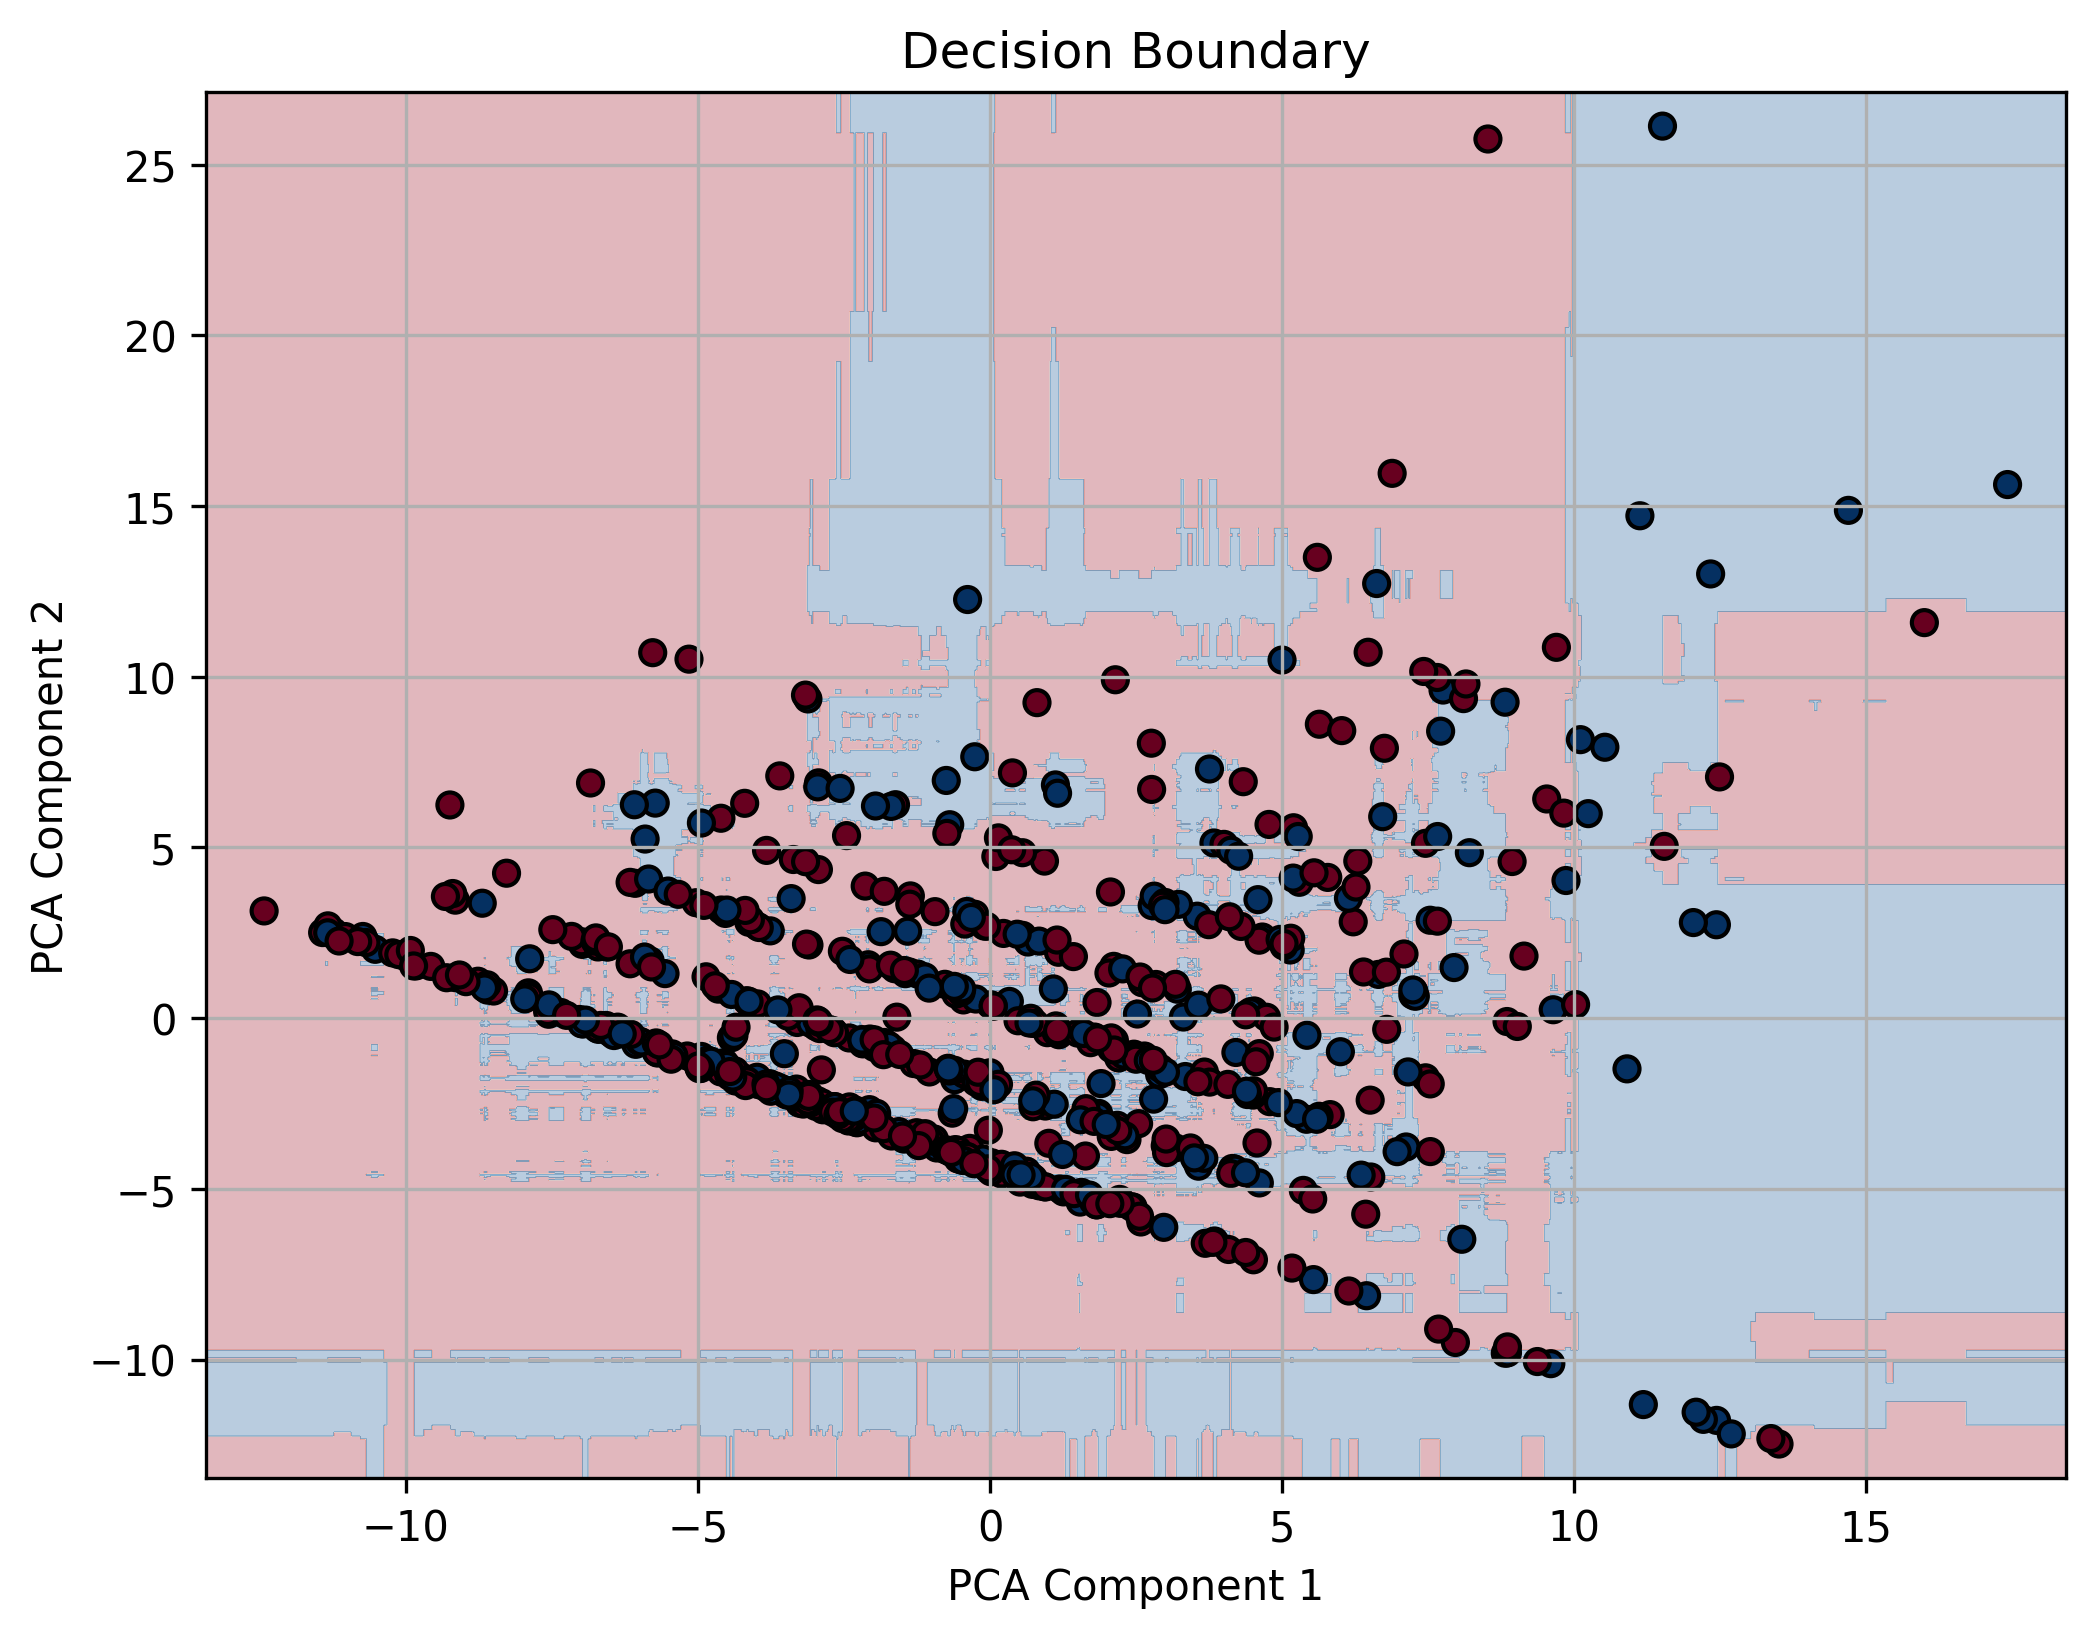

In [118]:
#PLOT_2
Image("Plot_2.png")

In [112]:
#PLOT_2
'''
Since the plot is non-linear and it appears to have rectangular,somewhat jagged and axis aligned boundaries.
So,the model related to this decision boundary would be 'RANDOM FOREST' 
'''

"\nSince the plot is non-linear and it appears to have rectangular,somewhat jagged and axis aligned boundaries.\nSo,the model related to this decision boundary would be 'RANDOM FOREST' \n"

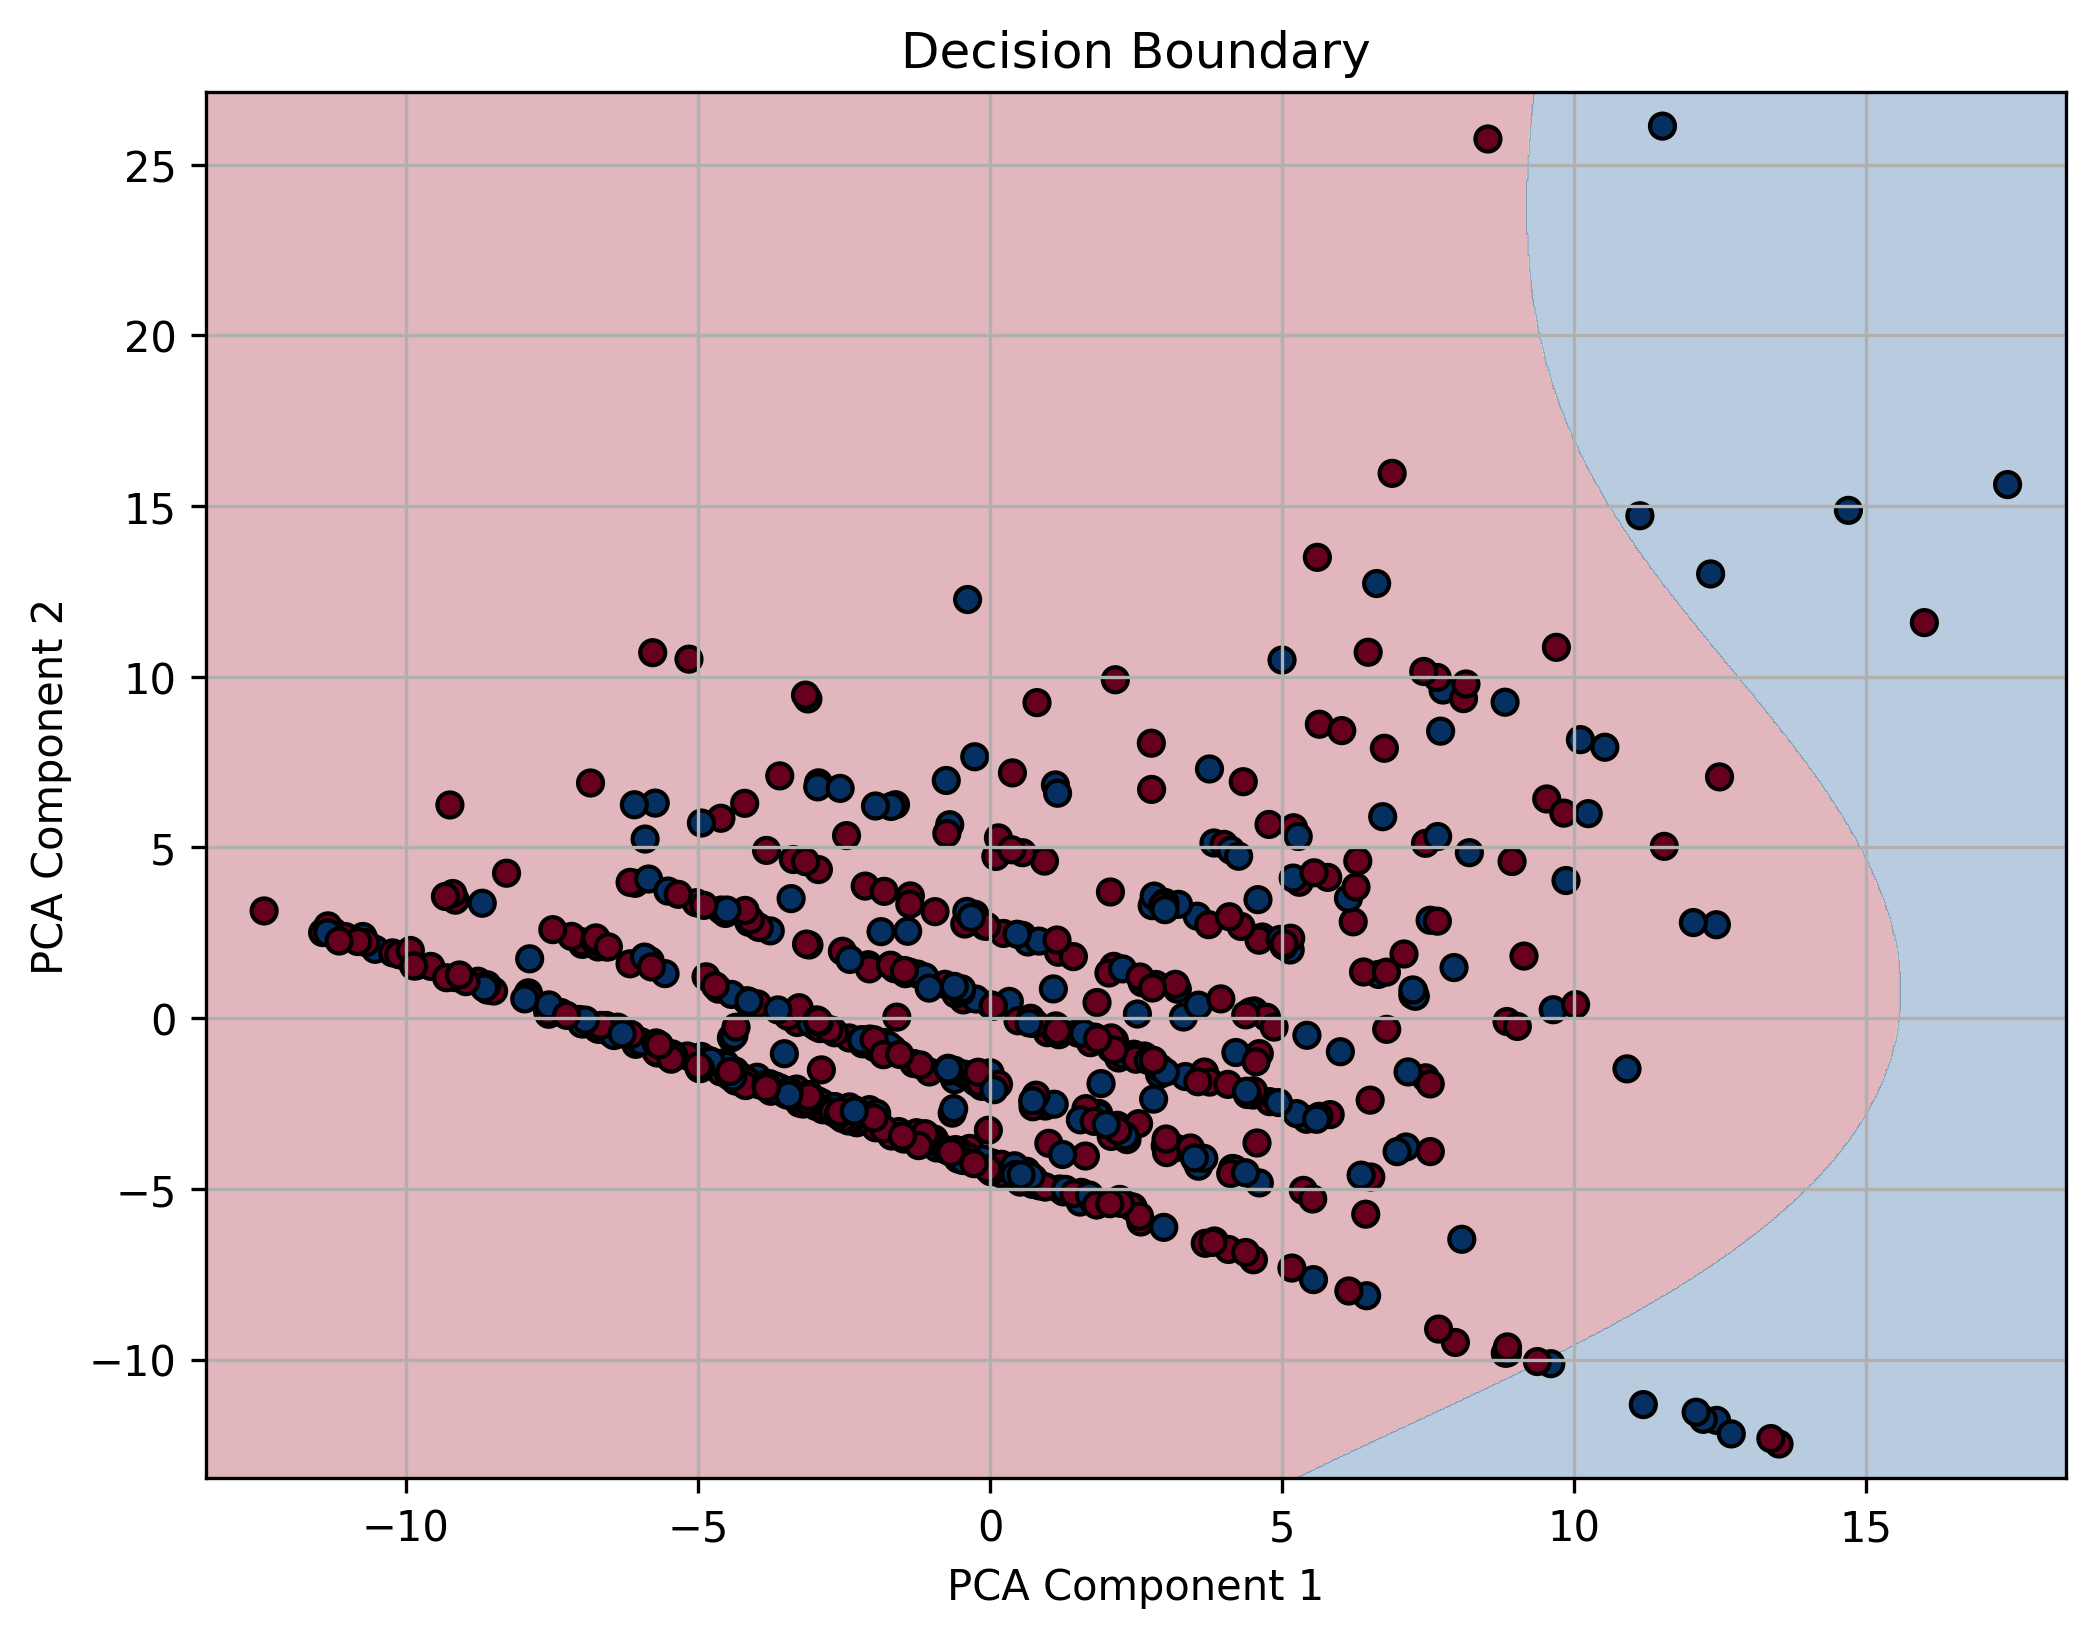

In [120]:
#PLOT_3
Image("Plot_3Image("Plot_2.png").png")

In [104]:
#PLOT_3
'''
Since the plot is non-linear and it appears to have smooth curves,somewhat complex and have continuous boundary.
So,the model related to this decision boundary would be 'LOGISTIC REGRESSION with some extra feature'
'''

"\nSince the plot is non-linear and it appears to have smooth curves,somewhat complex and have continuous boundary.\nSo,the model related to this decision boundary would be 'LOGISTIC REGRESSION with some extra feature'\n"

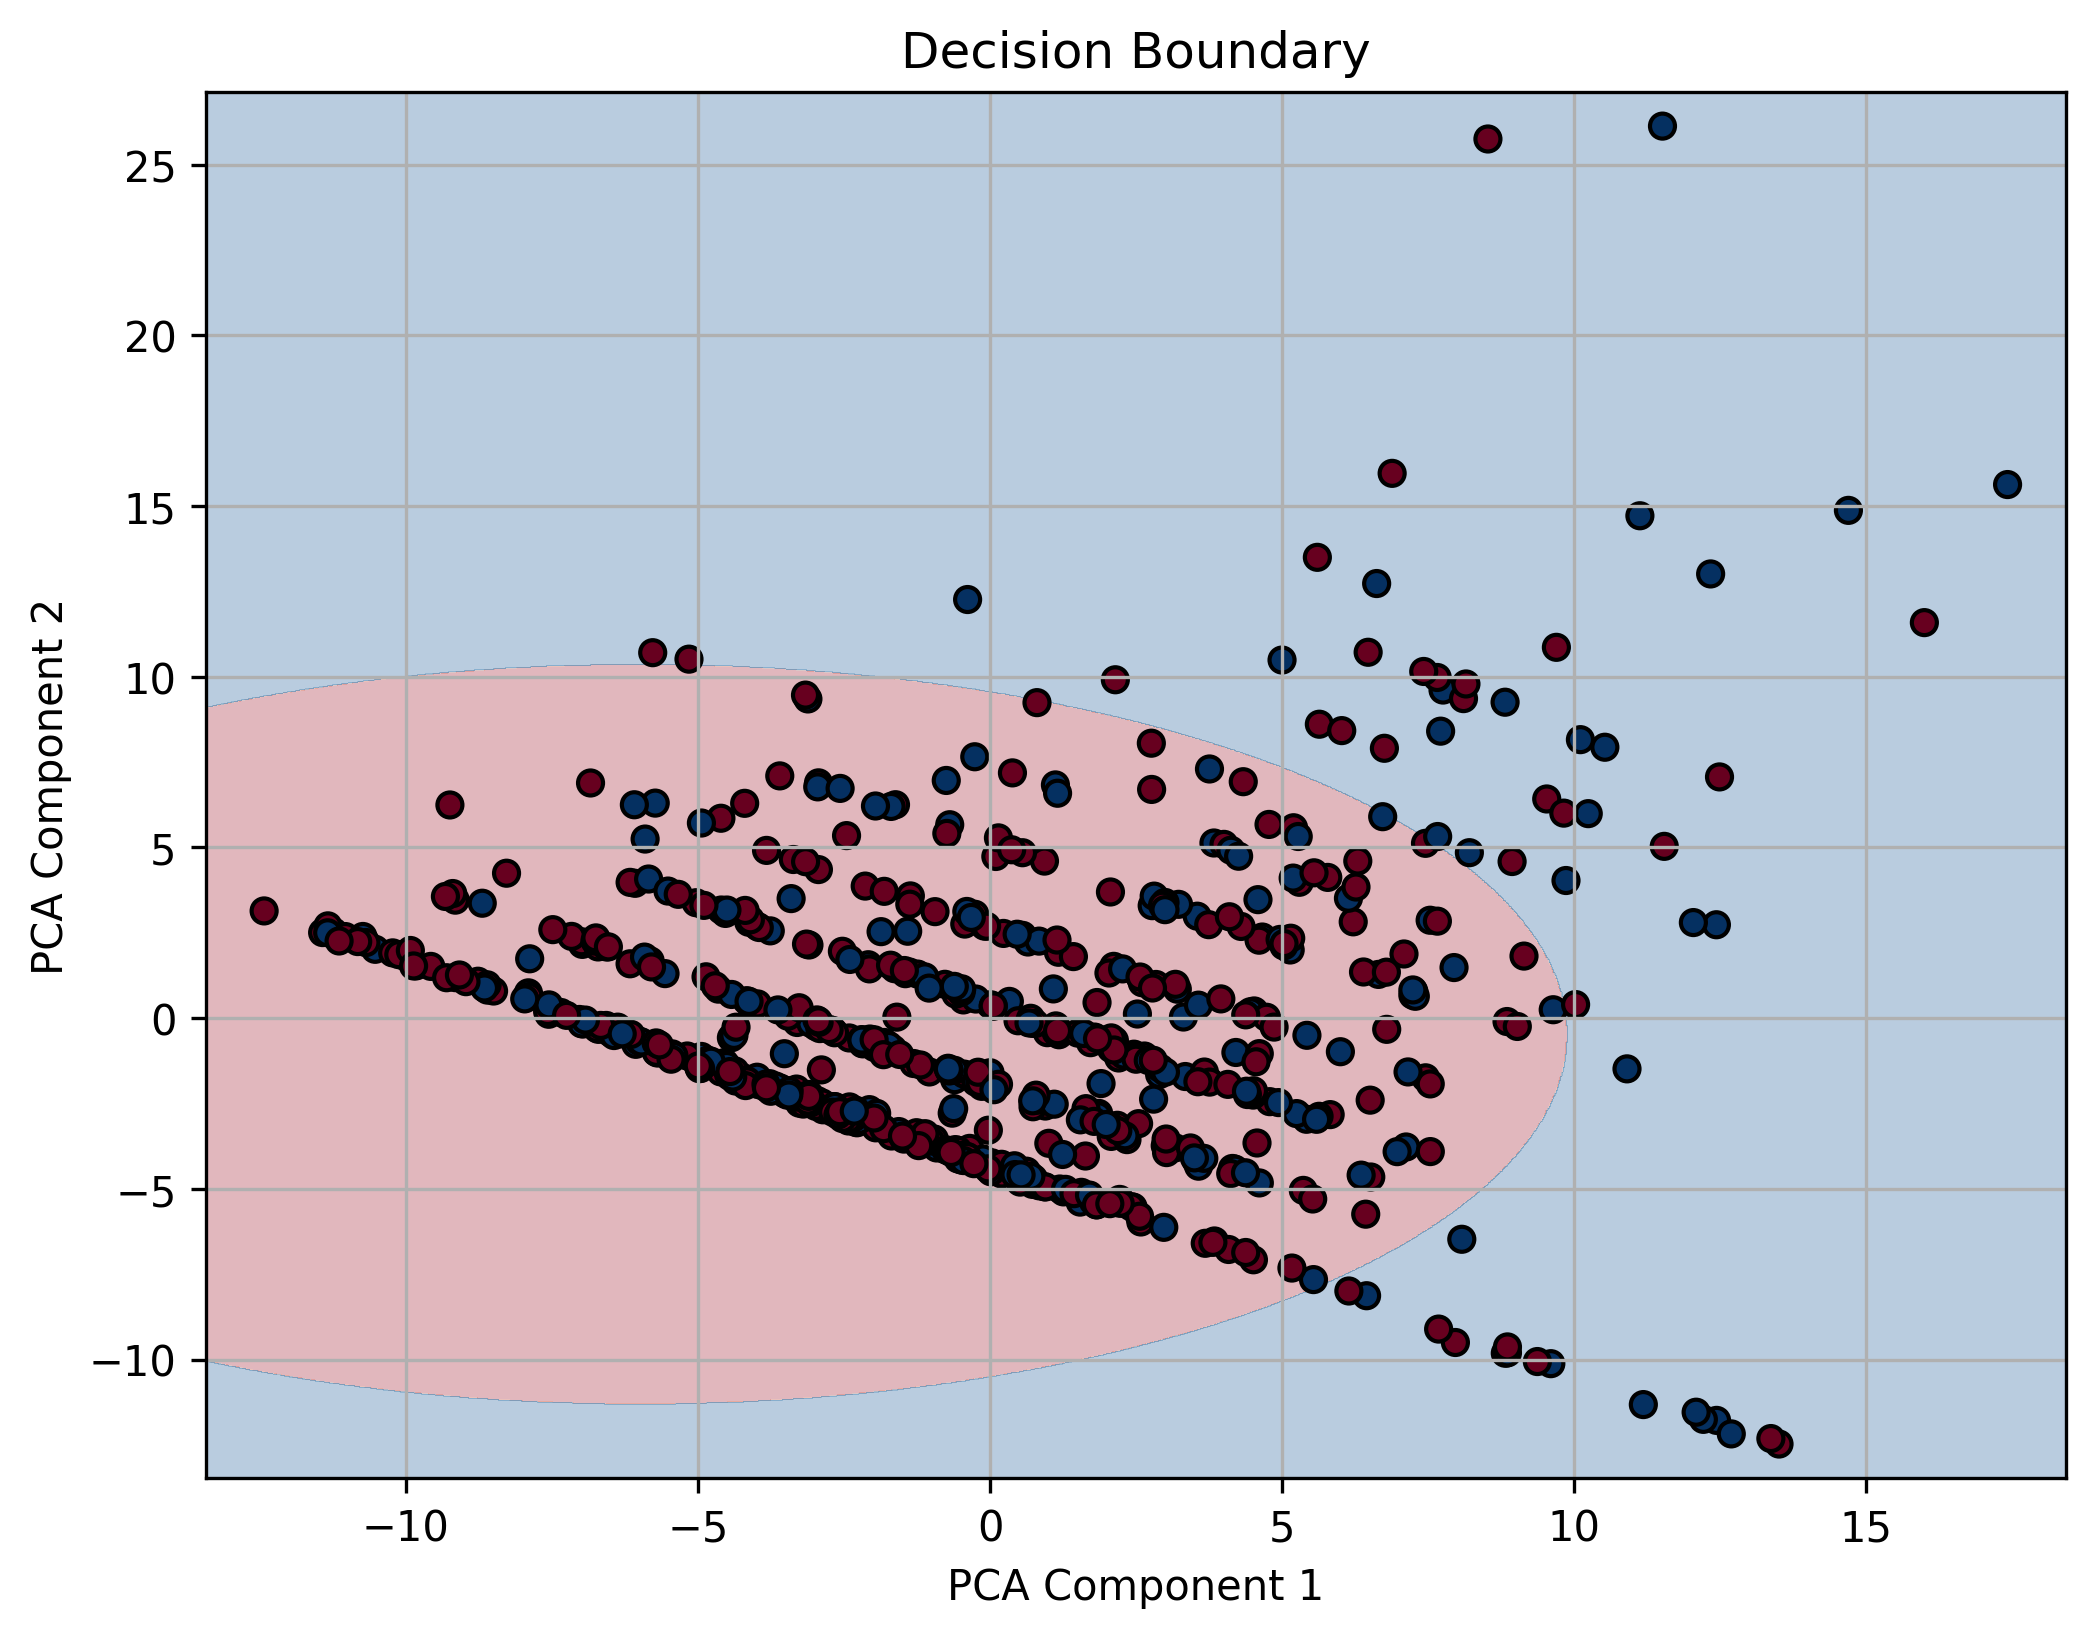

In [121]:
#PLOT_4
Image("Plot_4.png")

In [105]:
#PLOT_4
'''
Since the plot is non-linear and it appears to have elliptical-like curves,somewhat complex and symmetric boundaries.
So,the model related to this decision boundary would be 'NAIVE BAYES' 
'''

"\nSince the plot is non-linear and it appears to have elliptical-like curves,somewhat complex and symmetric boundaries.\nSo,the model related to this decision boundary would be 'NAIVE BAYES' \n"

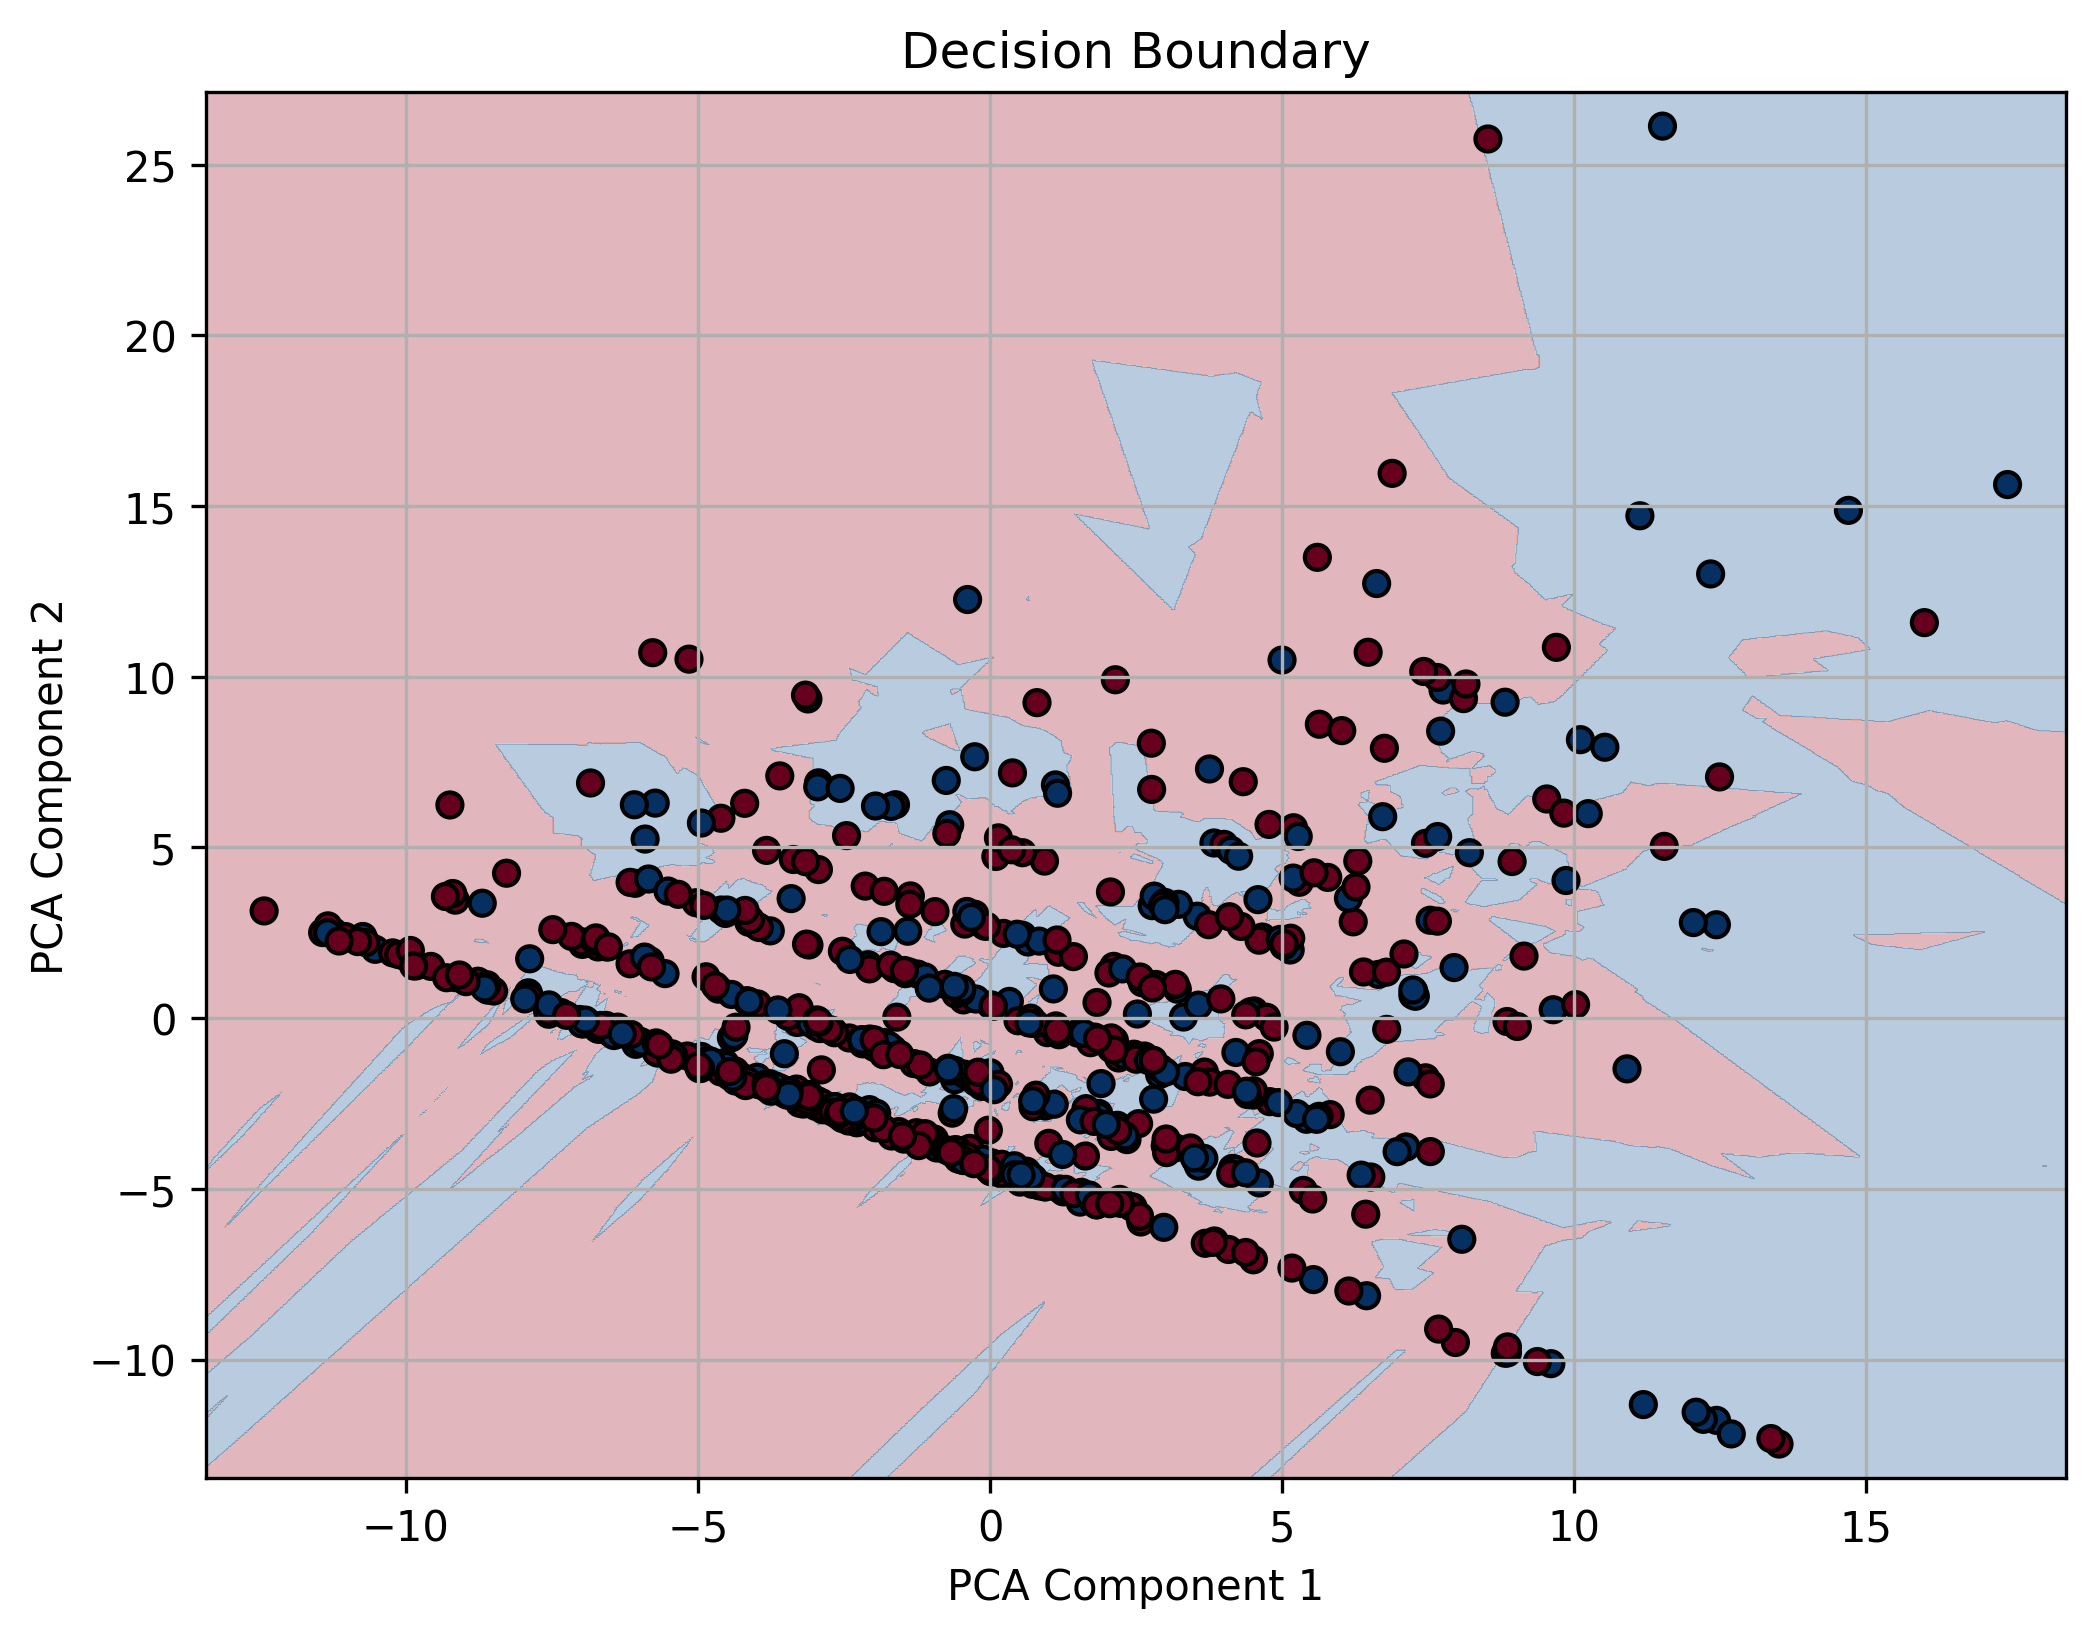

In [122]:
#PLOT_5
Image("Plot_5.png")

In [106]:
#PLOT_5
'''
Since the plot is non-linear and it appears highly irregular,highly complex with jagged patches.So,
the model related to this decision boundary would be 'K-Nearest Neighbors' 
'''

"\nSince the plot is non-linear and it appears highly irregular,highly complex with jagged patches.So,\nthe model related to this decision boundary would be 'K-Nearest Neighbors' \n"